In [1]:
import torch
import torchvision.models.resnet as resnet
import common_utils
import os

In [2]:
torch.cuda.is_available()

True

In [3]:
net = resnet.resnet18(pretrained = True)

In [4]:
artist_train, artist_test, artist_val = common_utils.get_dataloaders(batch_size=128)

In [4]:
# def set_optimizer(network, mode, new_lr, momentum):
#         if mode.lower() == 'sgd':
#             return optim.SGD(network.parameters(), lr = new_lr, momentum = momentum)
#         elif mode.lower() == 'adam':
#             return  optim.Adam(network.parameters(), lr = new_lr)
#         return None

# def train_with_params(network, mode, epochs, train, test, val, lr=1e-3, momentum=0.9,
#                       log_after=80, log_path=common_utils.log_dir,
#                       model_path=common_utils.model_dir, model_name=None):
#     '''Given a network, train on the provided data with the provided parameters.
    
#     This method performs training on the network with the provided data. This will persist
#     the model to a file with a name derived from the parameters, and will aditionally log
#     out to a file named based on the network parameters.
    
#     Parameters
#     ----------
#     network: torch.nn.Module
#     mode: str
#     epochs: int
#     train: torch.utils.data.DataLoader
#     test: torch.utils.data.DataLoader
#     val: torch.utils.data.DataLoader
#     lr: float
#     momentum: float
#     log_after:int
#         how many iterations to log after, within an epoch. if 0 or None, do no logging
#     log_path: str
#     model_path: str
#     model_name: str
#         if left None, a name will be generated based on the model params
    
#     Returns
#     -------
#     network: torch.nn.Module
#     '''

#     network.cuda()
    
#     criterion = nn.CrossEntropyLoss()
#     optimizer = set_optimizer(network, mode, lr, momentum)
#     if model_name is None:
#         model_name = '%s_e_%d_lr_%.3f' % (mode, epochs, lr)
#         if mode == 'sgd':
#             model_name += '_m_%d' % momentum
    
#     log =  open(os.path.join(log_path, model_name), 'w')
    
#     val_acc = []
#     iterations = []
#     train_len = len(train)
    
#     for epoch in range(epochs):
    
#         running_loss = 0
#         results_track = []

#         for i, sample in enumerate(train):
#             images, labels = sample['images'].cuda(), sample['labels'].cuda()
#             optimizer.zero_grad()
#             outputs = network(images)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
#             running_loss += loss.item()
#             if log_after and (i+1) % log_after == 0:
#                 loss_record = '[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / log_after)
#                 log.write(loss_record)
#                 print(loss_record)
                
#                 running_loss = 0.0
#                 with torch.no_grad():
#                     total = 0
#                     correct = 0
#                     for sample in val:
#                         images,labels = sample['images'].cuda(), sample['labels'].cuda()
#                         outputs = network(images)
#                         _, predicted = torch.max(outputs.data, 1)
#                         total += labels.size(0)
#                         correct += (predicted == labels).sum().item()
#                     val_acc.append(100*correct/total)
#                     iterations.append((i+1) + (train_len * epoch))
#                     acc_record = '[%d, %5d] test accuracy: %.3f' % (epoch + 1, i + 1, 100*correct/total)
#                     log.write(acc_record)
#                     print(acc_record)
#                     # if we haven't sufficiently improved, decrease the learning rate
#                     if len(results_track) > 4 :
#                         if results_track[-1] - results_track[0] < 1:
#                             lr /= 10
#                             optimizer = set_optimizer(mode, lr, momentum)
#                             lr_record = '[%d, %5d] new learning rate: %3f' % lr
#                             log.write(lr_record)
#                             print(lr_record)
#                         # shift this to be a moving
#                         results_track.pop(0)
#                         results_track.append(val_acc[-1])
#                     else:
#                         results_track.append(val_acc[-1])
#     plt.plot(iterations, val_acc)
#     plt.xlabel('number of iterations')
#     plt.ylabel('percent accuracy')
#     plt.show()

#     print('done')
    
#     log.close()
    
#     network_path = os.path.join(model_path, model_name)
#     torch.save(network.state_dict(), network_path)
#     print(f'network saved to {network_path}')
    
#     return network

[1,    80] loss: 2.813
[1,    80] test accuracy: 43.214
[2,    80] loss: 2.000
[2,    80] test accuracy: 46.714
[3,    80] loss: 1.769
[3,    80] test accuracy: 51.214
[4,    80] loss: 1.602
[4,    80] test accuracy: 51.857
[5,    80] loss: 1.509
[5,    80] test accuracy: 56.214
[6,    80] loss: 1.432
[6,    80] test accuracy: 57.286
[7,    80] loss: 1.396
[7,    80] test accuracy: 56.786
[8,    80] loss: 1.280
[8,    80] test accuracy: 58.500
[9,    80] loss: 1.253
[9,    80] test accuracy: 59.357
[10,    80] loss: 1.221
[10,    80] test accuracy: 60.000
[11,    80] loss: 1.205
[11,    80] test accuracy: 61.714
[12,    80] loss: 1.170
[12,    80] test accuracy: 62.571
[13,    80] loss: 1.111
[13,    80] test accuracy: 62.643
[14,    80] loss: 1.101
[14,    80] test accuracy: 63.357
[15,    80] loss: 1.057
[15,    80] test accuracy: 66.929
[16,    80] loss: 1.036
[16,    80] test accuracy: 65.357
[17,    80] loss: 0.984
[17,    80] test accuracy: 68.000
[18,    80] loss: 0.975
[18,    

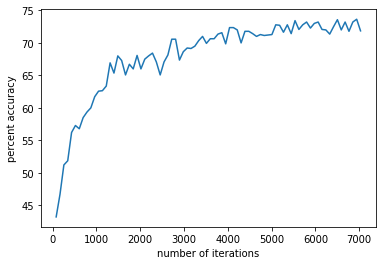

done


NameError: name 'os' is not defined

In [6]:
common_utils.train_with_params(net, "adam", 80, artist_train, artist_test, artist_val)

In [8]:
torch.save(net.state_dict(), 'pytorch_pretrained_resnet_model_80e')